In [78]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
import seaborn as sns

In [2]:
data = np.load("../data/11-01_mapped.npy")

#### We have 1 datapoint per 10 minutes, resulting in 144 data points per day

In [3]:
data.shape

(144, 100, 100)

In [4]:
def normalized(a, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(a, order, axis))
    l2[l2==0] = 1
    return a / np.expand_dims(l2, axis)

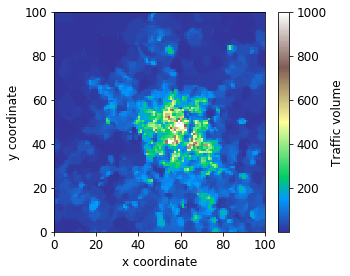

In [6]:
plt.rcParams.update({'font.size': 12})  
plt.figure(figsize=(5, 4))
dots1 = data[96]  # 15:00 UTC,  16:00 local Milan time
plt.pcolormesh(dots1, cmap='terrain', vmin=dots1.min(), vmax=1000)
plt.colorbar(label="Traffic volume")


plt.ylabel("y coordinate")
plt.xlabel("x coordinate")

plt.tight_layout()

plt.savefig("figa.pdf")


plt.show()

In [49]:
def plot_cell(cell_data, ax=None):
                        #  24 hours,  10 minute steps 
    x_grid = np.arange(0, cell_data.shape[0] / 6, 1 / 6)
    
    if ax is None:
        ax = plt.axes()
    ax.plot(x_grid, cell_data)

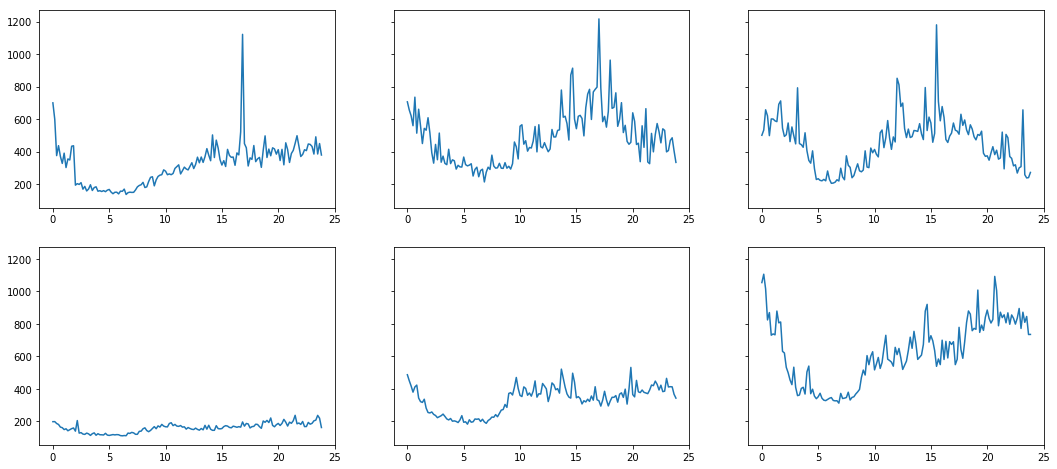

In [52]:
cell_coords = [
    [(45, 58), (47, 55), (50, 60)],
    [(45, 65), (55, 65), (55, 55)]
]
fig, axis_grid = plt.subplots(2, 3, sharey=True, figsize=(18, 8))

for line_coords, axis in zip(cell_coords, axis_grid):
    for coords, ax in zip(line_coords, axis):
        cell_data = data[:, coords[0], coords[1]]

        plot_cell(cell_data, ax)

## Data Range and Outlier analysis

In [19]:
print(data.mean())
print(data.std())
print(data.min())
print(data.max())

57.27725457618373
94.69406484079856
0.0
5063.972006037141


In [74]:
from scipy.stats import iqr

# Lets investigate outliers using Tukey's fences
def analize_iqr_outliers(volumes):
    iqrange = iqr(volumes)
    first_quartile = np.quantile(volumes, 0.25)
    third_quartile = np.quantile(volumes, 0.75)

    print("Interquartile range: {0}".format(iqrange))
    print("First quartile: {0}".format(first_quartile))
    print(f"third_quartile: {third_quartile}")

    k = 1.5
    outlier_threshold = third_quartile + k * iqrange

    outliers = volumes[volumes > outlier_threshold]

    print("There are: {0} points considered as outliers".format(len(outliers)))
    print("Which makes: {0}% of the data".format(len(outliers) / np.size(volumes) * 100))

In [75]:
analize_iqr_outliers(data)

Interquartile range: 51.93908519555043
First quartile: 10.70288904168552
third_quartile: 62.64197423723596
There are: 141291 points considered as outliers
Which makes: 9.811875% of the data


**Amplitude distributions in the central area**

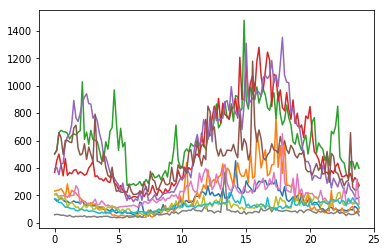

In [64]:
central_range_x = np.arange(45, 55)
central_range_y = np.arange(55, 65)
for x, y in zip(central_range_x, central_range_y):
    plot_cell(data[:, x, y])

In [76]:
central_region = data[:, central_range_x[0]:central_range_x[-1], central_range_y[0]:central_range_y[-1]]
analize_iqr_outliers(central_region)

Interquartile range: 274.3909521627498
First quartile: 188.87529075057336
third_quartile: 463.26624291332314
There are: 662 points considered as outliers
Which makes: 5.675582990397805% of the data


**Seems tempting to remove outliers:**

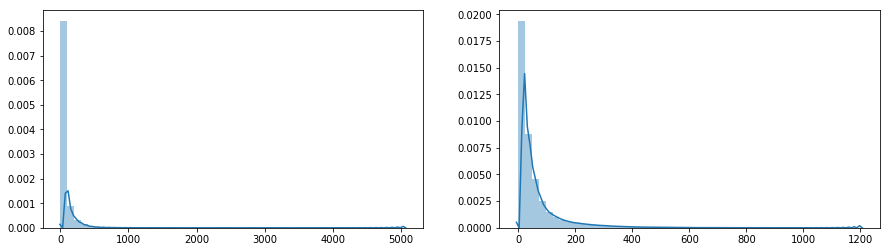

In [84]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.distplot(data.reshape(np.size(data)))

plt.subplot(1, 2, 2)
outliers_removed = data[data < 1200]
sns.distplot(outliers_removed)

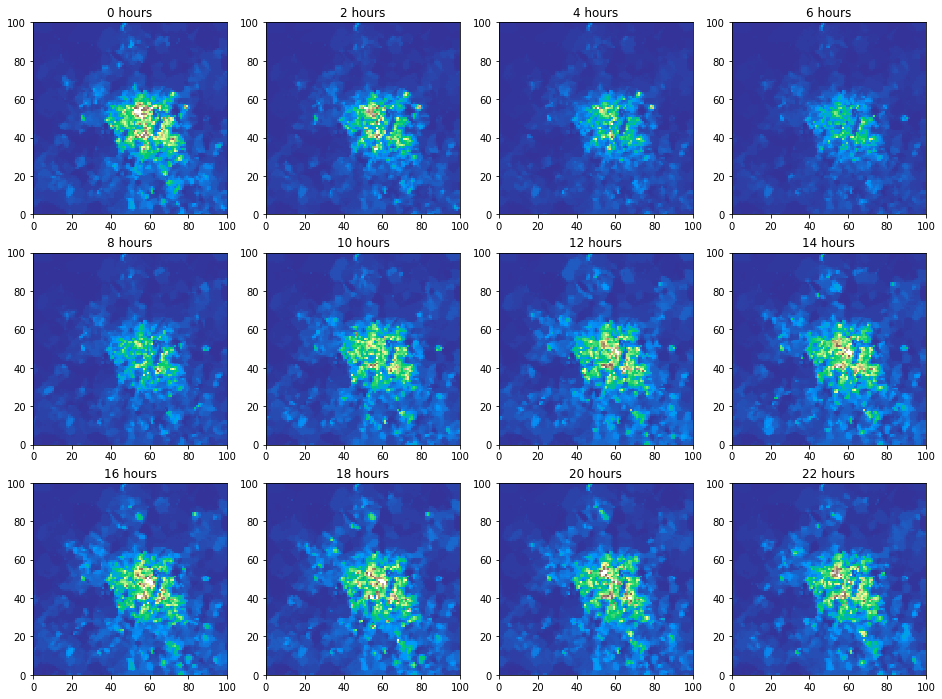

In [104]:
plt.figure(figsize=(16, 12))

for i in range(12): 
    index = i*12
    dots1 = data[index]  # 96 is 15:00 UTC,  16:00 local Milan time
    
    plt.subplot(3, 4, i+1)
    plt.pcolormesh(dots1, cmap='terrain', vmin=dots1.min(), vmax=1000)
    
    hour = index // 6
    plt.title(f"{hour} hours")
#     plt.colorbar(label="Traffic volume")
# 
# 
